# Loan Data from Prosper

## by Zaenab Ilesanmi



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#making all the columns visible
pd.set_option('display.max_columns', None)

In [3]:
#importing the dataset
df_loan = pd.read_csv(r"C:\Users\ileri\Downloads\prosperLoanData.csv")

In [4]:
#Overview of the dataset
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [5]:
#Checking for the number of rows and columns in the dataset (ie the structure)
df_loan.shape

(113937, 81)

In [6]:
#Checking for statistical information about the dataset
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
#Checking information about the data types in the data frame
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
#Checking for null values
df_loan.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
#Checking for the total null values in the dataset
df_loan.isna().sum().sum()

1364086

In [10]:
#checking for the percentage of null values in the dataset
(df_loan.isna().sum().sum()/df_loan.shape[0])*100

1197.228292828493

### NB: looking at the above percentage, dropping the missing values can really affect my analysis


In [11]:
#checking the dataset to understand the start and end year of the listing
df_loan["ListingCreationDate"].unique()

array(['2007-08-26 19:09:29.263000000', '2014-02-27 08:28:07.900000000',
       '2007-01-05 15:00:47.090000000', ...,
       '2013-12-13 05:49:12.703000000', '2011-11-14 13:18:26.597000000',
       '2014-01-15 09:27:37.657000000'], dtype=object)

In [12]:
#Creating a copy of the dataframe before cleaning
df_loan_copy = df_loan.copy()

## Data Cleaning

In [13]:
#creating an additional column of year to dataframe
df_loan_copy["Listing_creation_year"] = df_loan_copy["ListingCreationDate"].str.slice(0,4)


In [14]:
df_loan_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Listing_creation_year
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.

In [15]:
#Selecting the loan year after 2009
df_loan_copy = df_loan_copy[df_loan_copy["Listing_creation_year"] >"2009"]

In [16]:
df_loan_copy.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,Listing_creation_year
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,0,NaN,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,2013
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,False,NaN,2013-12-14 08:26:40,740.0,759.0,1973-03-01 00:00:00,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123257,15000,2013-12-24 00:00:00,Q4 2013,874A3701157341738DE458F,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2013
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2

In [17]:
#Confirming the selected years
df_loan_copy['Listing_creation_year'].unique()

array(['2014', '2012', '2013', '2010', '2011'], dtype=object)

In [18]:
#changing the dates in the dataframe to correct data type
df_loan_copy["ListingCreationDate"] = df_loan_copy["ListingCreationDate"].astype("datetime64")
df_loan_copy["ClosedDate"] = df_loan_copy["ClosedDate"].astype("datetime64")


In [19]:
#checking the dataframe to see the datatypes 
df_loan_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82675 entries, 1 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           82675 non-null  object        
 1   ListingNumber                        82675 non-null  int64         
 2   ListingCreationDate                  82675 non-null  datetime64[ns]
 3   CreditGrade                          0 non-null      object        
 4   Term                                 82675 non-null  int64         
 5   LoanStatus                           82675 non-null  object        
 6   ClosedDate                           23827 non-null  datetime64[ns]
 7   BorrowerAPR                          82675 non-null  float64       
 8   BorrowerRate                         82675 non-null  float64       
 9   LenderYield                          82675 non-null  float64       
 10  Estimated

In [20]:
df_loan_copy.Listing_creation_year.value_counts()

2013    35413
2012    19556
2011    11442
2014    10734
2010     5530
Name: Listing_creation_year, dtype: int64

In [21]:
#selecting the columns needed for my analysis
df_loan_copy_needed = df_loan_copy[["Listing_creation_year", "Occupation", "EmploymentStatus","IsBorrowerHomeowner", "Term", "LoanStatus", "ClosedDate", "BorrowerRate", "ListingCategory (numeric)",
                     "CreditScoreRangeLower", "CreditScoreRangeUpper", "BorrowerAPR", "StatedMonthlyIncome", "LoanOriginalAmount"]]

In [22]:
#checking to see the selected columns for my new dataframe (df_loan_copy_needed)
df_loan_copy_needed.head()

,Listing_creation_year,Occupation,EmploymentStatus,IsBorrowerHomeowner,Term,LoanStatus,ClosedDate,BorrowerRate,ListingCategory (numeric),CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount
1,2014,Professional,Employed,False,36,Current,NaT,0.0920,2,680.0,699.0,0.12016,6125.000000,10000
3,2012,Skilled Labor,Employed,True,36,Current,NaT,0.0974,16,800.0,819.0,0.12528,2875.000000,10000
4,2013,Executive,Employed,True,36,Current,NaT,0.2085,2,680.0,699.0,0.24614,9583.333333,15000
5,2013,Professional,Employed,True,60,Current,NaT,0.1314,1,740.0,759.0,0.15425,8333.333333,15000
6,2013,Sales - Retail,Employed,False,36,Current,NaT,0.2712,1,680.0,699.0,0.31032,2083.333333,3000


In [23]:
#checking the shape of the new dataframe
df_loan_copy_needed.shape

(82675, 14)

In [24]:
#checking for the null values in the new dataframe
df_loan_copy_needed.isnull().sum()

Listing_creation_year            0
Occupation                    1333
EmploymentStatus                 0
IsBorrowerHomeowner              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerRate                     0
ListingCategory (numeric)        0
CreditScoreRangeLower            0
CreditScoreRangeUpper            0
BorrowerAPR                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
dtype: int64

In [25]:
#There are so many missing values in Closed date hence would need to be dropped to mantain the integrity of the dataset
df_loan_copy_needed.drop(["ClosedDate"], axis=1, inplace =True )

C:\Users\ileri\AppData\Local\Temp\ipykernel_10452\755347556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_copy_needed.drop(["ClosedDate"], axis=1, inplace =True )


In [26]:
#checking to be sure the column dropped
df_loan_copy_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82675 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Listing_creation_year      82675 non-null  object 
 1   Occupation                 81342 non-null  object 
 2   EmploymentStatus           82675 non-null  object 
 3   IsBorrowerHomeowner        82675 non-null  bool   
 4   Term                       82675 non-null  int64  
 5   LoanStatus                 82675 non-null  object 
 6   BorrowerRate               82675 non-null  float64
 7   ListingCategory (numeric)  82675 non-null  int64  
 8   CreditScoreRangeLower      82675 non-null  float64
 9   CreditScoreRangeUpper      82675 non-null  float64
 10  BorrowerAPR                82675 non-null  float64
 11  StatedMonthlyIncome        82675 non-null  float64
 12  LoanOriginalAmount         82675 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
m

In [27]:
#checking for the sum of null values
df_loan_copy_needed.isna().sum()

Listing_creation_year           0
Occupation                   1333
EmploymentStatus                0
IsBorrowerHomeowner             0
Term                            0
LoanStatus                      0
BorrowerRate                    0
ListingCategory (numeric)       0
CreditScoreRangeLower           0
CreditScoreRangeUpper           0
BorrowerAPR                     0
StatedMonthlyIncome             0
LoanOriginalAmount              0
dtype: int64

In [28]:
#dropping the null
df_loan_copy_needed.dropna(inplace=True)


C:\Users\ileri\AppData\Local\Temp\ipykernel_10452\3232315319.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_copy_needed.dropna(inplace=True)


In [29]:
#confirming uniformness of the new dataframe
df_loan_copy_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81342 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Listing_creation_year      81342 non-null  object 
 1   Occupation                 81342 non-null  object 
 2   EmploymentStatus           81342 non-null  object 
 3   IsBorrowerHomeowner        81342 non-null  bool   
 4   Term                       81342 non-null  int64  
 5   LoanStatus                 81342 non-null  object 
 6   BorrowerRate               81342 non-null  float64
 7   ListingCategory (numeric)  81342 non-null  int64  
 8   CreditScoreRangeLower      81342 non-null  float64
 9   CreditScoreRangeUpper      81342 non-null  float64
 10  BorrowerAPR                81342 non-null  float64
 11  StatedMonthlyIncome        81342 non-null  float64
 12  LoanOriginalAmount         81342 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(4)
m

In [30]:
#changing the column names to lower case
df_loan_copy_needed.columns = map(str.lower, df_loan_copy_needed.columns)
df_loan_copy_needed

,listing_creation_year,occupation,employmentstatus,isborrowerhomeowner,term,loanstatus,borrowerrate,listingcategory (numeric),creditscorerangelower,creditscorerangeupper,borrowerapr,statedmonthlyincome,loanoriginalamount
1,2014,Professional,Employed,False,36,Current,0.0920,2,680.0,699.0,0.12016,6125.000000,10000
3,2012,Skilled Labor,Employed,True,36,Current,0.0974,16,800.0,819.0,0.12528,2875.000000,10000
4,2013,Executive,Employed,True,36,Current,0.2085,2,680.0,699.0,0.24614,9583.333333,15000
5,2013,Professional,Employed,True,60,Current,0.1314,1,740.0,759.0,0.15425,8333.333333,15000
6,2013,Sales - Retail,Employed,False,36,Current,0.2712,1,680.0,699.0,0.31032,2083.333333,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,2013,Food Service Management,Employed,True,36,Current,0.1864,1,700.0,719.0,0.22354,4333.333333,10000
113933,2011,Professional,Employed,True,36,FinalPaymentInProgress,0.1110,7,700.0,719.0,0.13220,8041.666667,2000
113934,2013,Other,Employed,True,60,Current,0.2150,1,700.0,719.0,0.23984,2875.000000,10000
113935,2011,Food Service,Full-time,True,60,Completed,0.2605,2,680.0,699.0,0.28408,3875.000000,15000


In [31]:
#changing the texts in the dataframe to lower case
df_loan_copy_needed["loanstatus"].str.lower()
df_loan_copy_needed["occupation"].str.lower()
df_loan_copy_needed["employmentstatus"].str.lower()


1          employed
3          employed
4          employed
5          employed
6          employed
            ...    
113932     employed
113933     employed
113934     employed
113935    full-time
113936     employed
Name: employmentstatus, Length: 81342, dtype: object

In [32]:
#renaming the column names for ease of read
df_loan_copy_needed.rename(columns={"listingnumber":"listing_number", "listing_creation_year":"listing_cration_year", "term":"term", "loanstatus":"loan_status", "employmentstatus":"employment_status", "isborrowerhomeowner":"is_borrower_home_owner", "closeddate":"closed_date", "borrowerrate":"borrower_rate", "listingcategory (numeric)":"listing_category_(numeric)",
                     "creditscorerangelower":"credit_score_range_lower", "creditscorerangeupper":"credit_score_range_upper", "borrowerapr":"borrower_apr", "statedmonthlyincome":"stated_monthly_income", "loanoriginalamount":"loan_original_amount"}, inplace=True)

C:\Users\ileri\AppData\Local\Temp\ipykernel_10452\2543726429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_copy_needed.rename(columns={"listingnumber":"listing_number", "listing_creation_year":"listing_cration_year", "term":"term", "loanstatus":"loan_status", "employmentstatus":"employment_status", "isborrowerhomeowner":"is_borrower_home_owner", "closeddate":"closed_date", "borrowerrate":"borrower_rate", "listingcategory (numeric)":"listing_category_(numeric)",


In [33]:
#checking the descriptive statistic of the new data frame 
df_loan_copy_needed.describe()

,term,borrower_rate,listing_category_(numeric),credit_score_range_lower,credit_score_range_upper,borrower_apr,stated_monthly_income,loan_original_amount
count,81342.000000,81342.000000,81342.000000,81342.000000,81342.000000,81342.000000,8.134200e+04,81342.000000
mean,42.689681,0.196321,3.333592,699.502102,718.502102,0.227129,5.989633e+03,9229.537078
std,11.774812,0.074315,4.413596,46.778760,46.778760,0.079636,8.389522e+03,6301.750553
min,12.000000,0.040000,0.000000,600.000000,619.000000,0.049350,0.000000e+00,1000.000000
25%,36.000000,0.136400,1.000000,660.000000,679.000000,0.164990,3.500000e+03,4000.000000
50%,36.000000,0.187500,1.000000,700.000000,719.000000,0.219450,5.000000e+03,8000.000000
75%,60.000000,0.257400,3.000000,720.000000,739.000000,0.292650,7.166667e+03,14000.000000
max,60.000000,0.360000,20.000000,880.000000,899.000000,0.423950,1.750003e+06,35000.000000


In [34]:
#replacing the values in the listing category with their corresponding description
df_loan_copy_needed['listing_category_(numeric)']= df_loan_copy_needed['listing_category_(numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['not_available','debt_consolidation','home_improvement','business','personal_loan','student_use','auto','other','baby_and_adoption','boat','cosmetic_procedure','engagement_ring','green_loans','household_expenses','large_purchases','medical/dental','motorcycle','rv','taxes','vacation','wedding_loans'])

C:\Users\ileri\AppData\Local\Temp\ipykernel_10452\2325707349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_copy_needed['listing_category_(numeric)']= df_loan_copy_needed['listing_category_(numeric)'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],['not_available','debt_consolidation','home_improvement','business','personal_loan','student_use','auto','other','baby_and_adoption','boat','cosmetic_procedure','engagement_ring','green_loans','household_expenses','large_purchases','medical/dental','motorcycle','rv','taxes','vacation','wedding_loans'])


In [35]:
#confirming the renaming of the listing category column
df_loan_copy_needed.head()

,listing_cration_year,occupation,employment_status,is_borrower_home_owner,term,loan_status,borrower_rate,listing_category_(numeric),credit_score_range_lower,credit_score_range_upper,borrower_apr,stated_monthly_income,loan_original_amount
1,2014,Professional,Employed,False,36,Current,0.0920,home_improvement,680.0,699.0,0.12016,6125.000000,10000
3,2012,Skilled Labor,Employed,True,36,Current,0.0974,motorcycle,800.0,819.0,0.12528,2875.000000,10000
4,2013,Executive,Employed,True,36,Current,0.2085,home_improvement,680.0,699.0,0.24614,9583.333333,15000
5,2013,Professional,Employed,True,60,Current,0.1314,debt_consolidation,740.0,759.0,0.15425,8333.333333,15000
6,2013,Sales - Retail,Employed,False,36,Current,0.2712,debt_consolidation,680.0,699.0,0.31032,2083.333333,3000


### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Although some of the datatypes of variables like Year was misrepresented.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interests are, Loan status, Loan original amount and Borrower rate

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that would help support my investigation are; occupation, employment status, is borrower homeowner, credit score, borrower apr, term and listing categrory


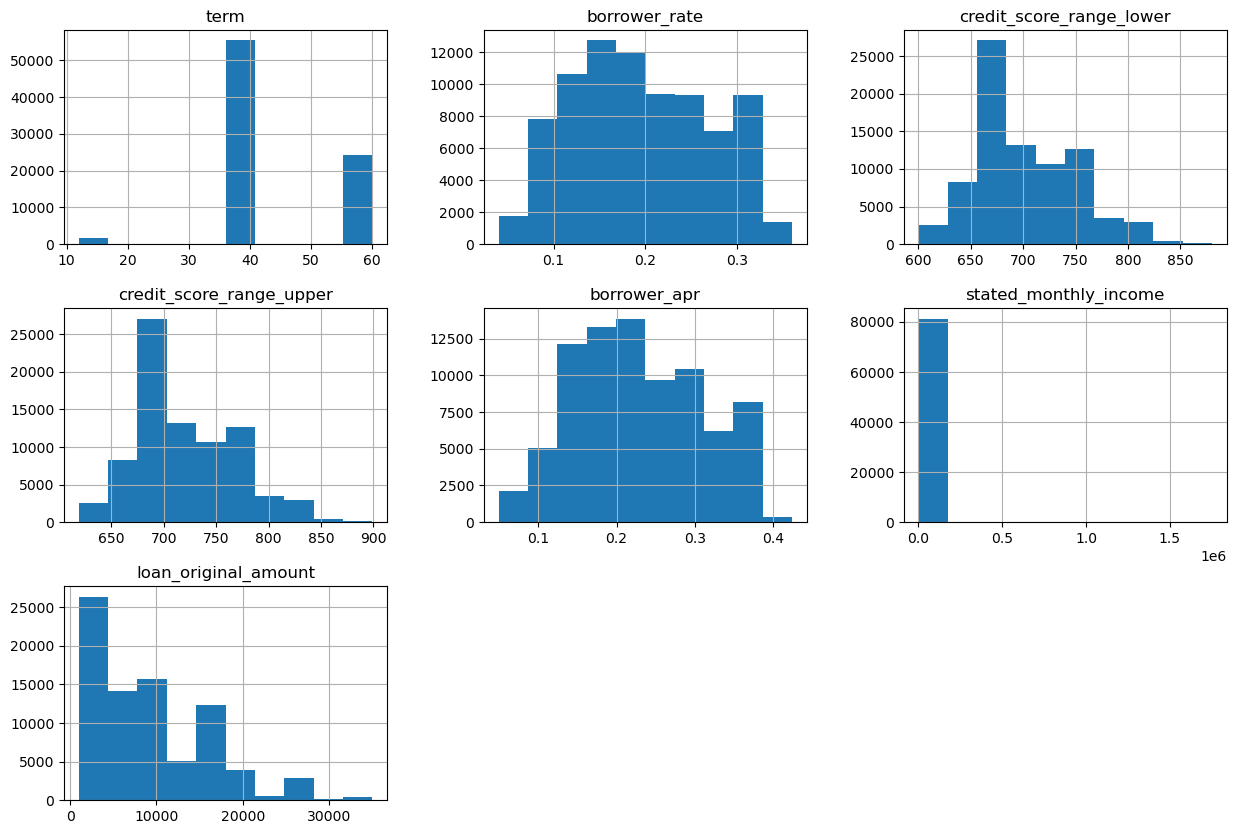

In [36]:
#a visualisation of the descriptives
df_loan_copy_needed.hist(figsize=(15,10));

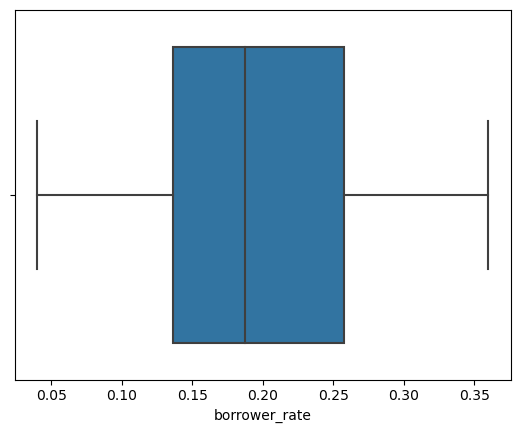

In [37]:
#visualising borrower rate
color = sb.color_palette()[0]
sb.boxplot(x=df_loan_copy_needed.borrower_rate);

#### Majority of the interest rate for the loan is between 10% and 30%

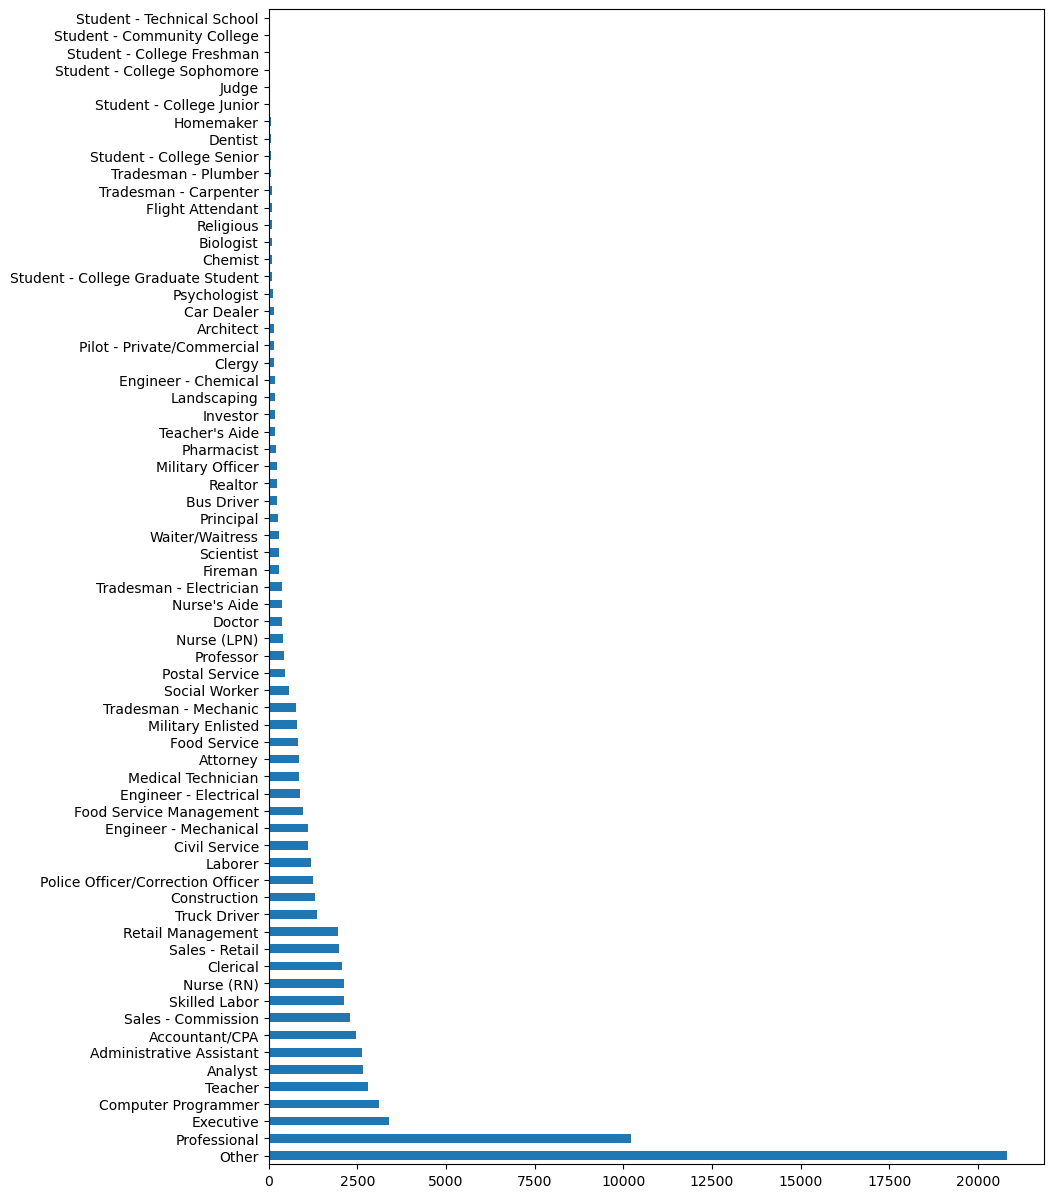

In [38]:
#looking at the occupation demograph of borrowers
df_loan_copy_needed['occupation'].value_counts().plot.barh( figsize=(10,15));

#### Borrowers whose specific occupation was not stated are the ones who took the most loan

In [39]:
occupation_count = df_loan_copy_needed['occupation'].value_counts().reset_index(name='occupation')[:10]
occupation_order = occupation_count['index']

In [40]:
#investigating the total number of borrowers from specific occupation
occupation_count


,index,occupation
0,Other,20811
1,Professional,10232
2,Executive,3388
3,Computer Programmer,3099
4,Teacher,2807
5,Analyst,2649
6,Administrative Assistant,2640
7,Accountant/CPA,2474
8,Sales - Commission,2297
9,Skilled Labor,2135


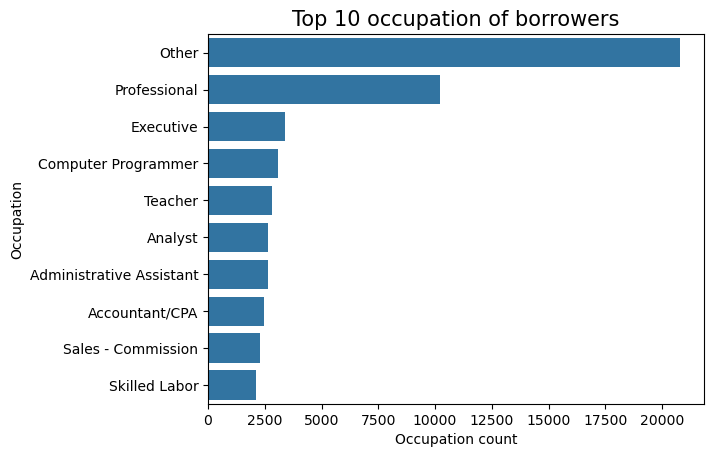

In [41]:
#Checking for the Top 10 occupation of people that took loan

sb.countplot(data = df_loan_copy_needed, y = 'occupation', color= color, order=occupation_order);
plt.xlabel('Occupation count', size = 10)
plt.ylabel('Occupation', size = 10)
plt.title('Top 10 occupation of borrowers', size = 15);

In [42]:
#investigating the Top 10 listing category for the use of Loan
listing_count = df_loan_copy_needed['listing_category_(numeric)'].value_counts().reset_index(name='listing_category_(numeric)')[:10]
listing_order = listing_count['index']

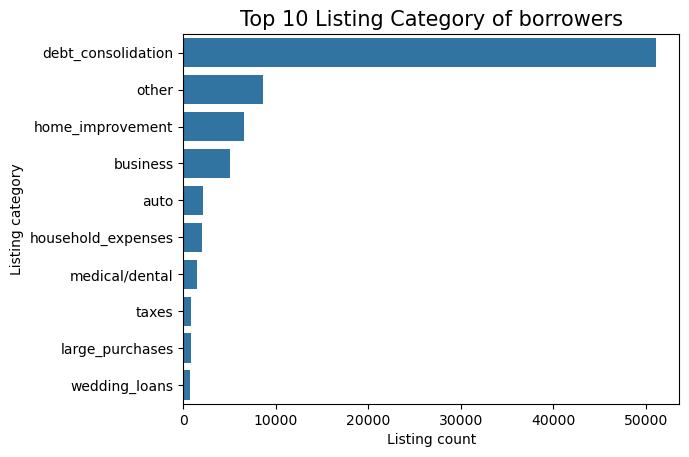

In [43]:
#Visualising the Top 10 listing category for the reason why people took loan
sb.countplot(data = df_loan_copy_needed, y = 'listing_category_(numeric)', color= color, order=listing_order);
plt.xlabel('Listing count', size = 10)
plt.ylabel('Listing category', size = 10)
plt.title('Top 10 Listing Category of borrowers', size = 15);

#### from the visualisation above, it is evident that majority of the people who took loan used it for debt consolidation

In [44]:
#calculating the percentage of the borrowers who are home owners
percentage_of_homeowner = df_loan_copy_needed['is_borrower_home_owner'].value_counts()*100/df_loan_copy_needed['is_borrower_home_owner'].count()

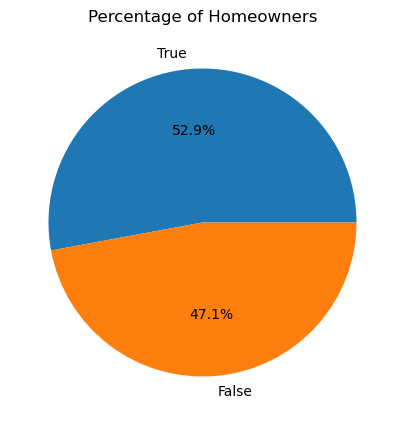

In [45]:
#checking for the percentage of home owners that are borrower
percentage_of_homeowner.plot(kind='pie', autopct='%0.1f%%', figsize=(10,5), ylabel='',title='Percentage of Homeowners');

#### From the visualisation above, 52.9% of Borrowers are Homeowners while 47.1% do not own homes

In [46]:
#calculating the percentage of loan status
percentage_of_loan_status = df_loan_copy_needed['loan_status'].value_counts()*100/df_loan_copy_needed['loan_status'].count()

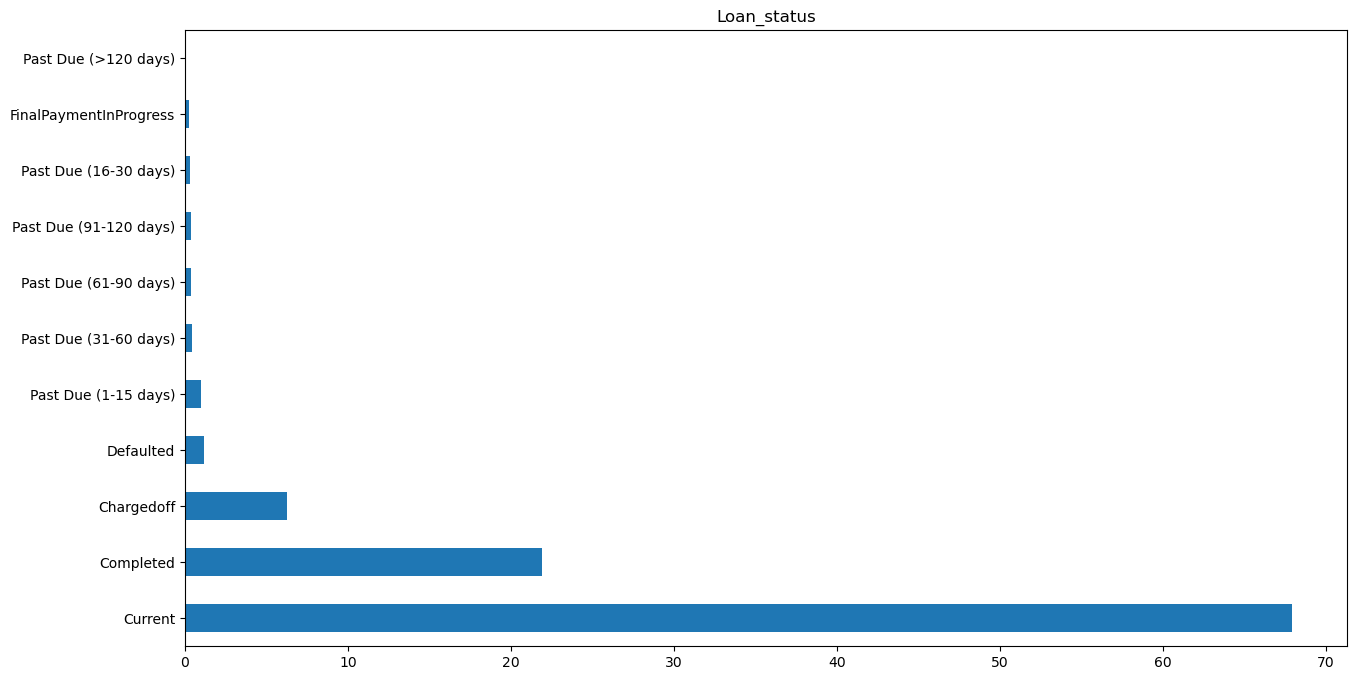

In [47]:
#plotting bar chart to better visualise the percentage of loan status
percentage_of_loan_status.plot(kind='barh', figsize=(15,8), ylabel='', title= 'Loan_status');

#### From the above visualisation, majority of the loans are still active while less 5% have defaulted 

## Bivariate Exploration

In [48]:
#checking for the correlation between variables of interest
df_loan_copy_needed.corr()

,is_borrower_home_owner,term,borrower_rate,credit_score_range_lower,credit_score_range_upper,borrower_apr,stated_monthly_income,loan_original_amount
is_borrower_home_owner,1.000000,0.077675,-0.124305,0.274925,0.274925,-0.132962,0.118556,0.178224
term,0.077675,1.000000,-0.001851,0.052811,0.052811,-0.072827,0.006983,0.335443
borrower_rate,-0.124305,-0.001851,1.000000,-0.502712,-0.502712,0.993301,-0.095004,-0.425568
credit_score_range_lower,0.274925,0.052811,-0.502712,1.000000,1.000000,-0.519481,0.065317,0.277833
credit_score_range_upper,0.274925,0.052811,-0.502712,1.000000,1.000000,-0.519481,0.065317,0.277833
borrower_apr,-0.132962,-0.072827,0.993301,-0.519481,-0.519481,1.000000,-0.095299,-0.439891
stated_monthly_income,0.118556,0.006983,-0.095004,0.065317,0.065317,-0.095299,1.000000,0.179956
loan_original_amount,0.178224,0.335443,-0.425568,0.277833,0.277833,-0.439891,0.179956,1.000000


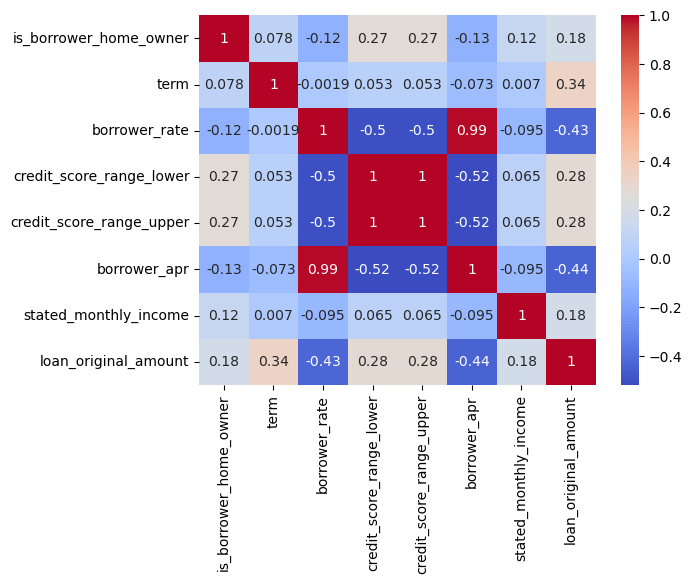

In [49]:
#plotting a heatmap for proper visualisation of the relationships between variables of interest
sb.heatmap(df_loan_copy_needed.corr(), annot=True, cmap='coolwarm');

#### The heatmap above shows the correlation between several quantitative variables. Some relationships as observed in different colors shows strong positive correlation (red), some showed weak relationship (brown and sky blue), while others show negative correlation(blue)   

In [50]:
#y = df_loan_copy_needed.loan_original_amount.value_counts().values
#x = df_loan_copy_needed.occupation.value_counts().index

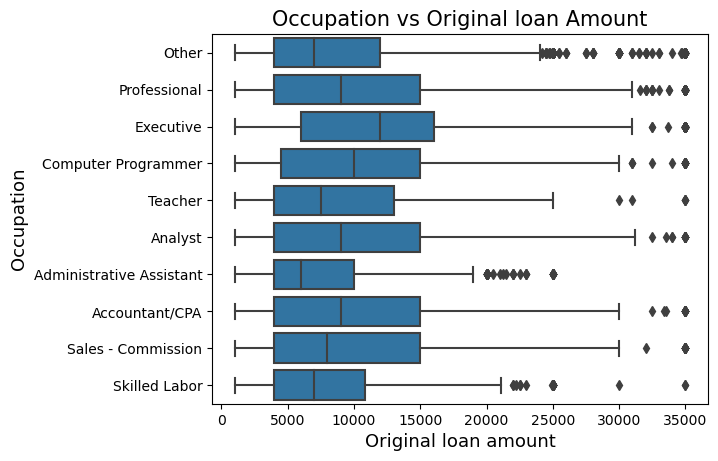

In [51]:
#plotting the visual between occupation and original loan amount to understand the relationship between them
sb.boxplot(data = df_loan_copy_needed, y = 'occupation', x = 'loan_original_amount', order = occupation_order, color = color)

# Format the plot's visual
plt.ylabel('Occupation', size = 13)
plt.xlabel('Original loan amount', size = 13);
plt.title('Occupation vs Original loan Amount', size = 15);

#### From the boxplot above box plot, the people who selected their occupation as 'other' appears to take the highest amount of loan with more people taking up t0 35000 as compared to other professions. Skilled labour and administrative assistant took the least amount of loan from range 4500-15000

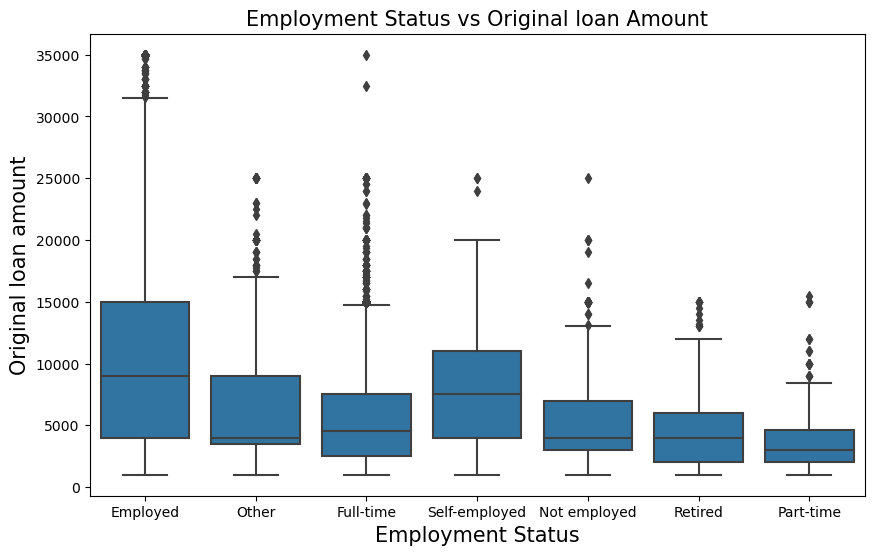

In [52]:
#visualising employment status of borrowers against the original loan amount
plt.figure(figsize = [10, 6])
sb.boxplot(data = df_loan_copy_needed, y = 'loan_original_amount', x = 'employment_status', color = color)

# Format the plot's visual
plt.ylabel('Original loan amount', size = 15)
plt.xlabel('Employment Status', size = 15);
plt.title('Employment Status vs Original loan Amount', size = 15);

#### From the above boxplot, people in full time employment took more loans at the range of  15000 to 25000 with only very few taking loan of up to 35000 while retired people took less loan of less than 20000. People in part time employment took the least loan with few of them ranging up to 18000

In [53]:
#creating range for the dloan original amount due to large number of values
#defining function filter 
def filter(x):
    if x <= 5000:
        return 5000
    if (x >= 5000 and x <= 10000):
        return 10000
    if (x >= 10000 and x <= 15000):
        return 15000
    if (x >=15000 and x <= 20000):
        return 20000
    if (x >=20000 and x<=25000):
        return 25000
    if (x >=25000 and x<=30000):
        return 30000
    if (x >=30000 and x<=35000):
        return 35000
df_loan_copy_needed['loan_original_amount'] = df_loan_copy_needed['loan_original_amount'].apply(filter)

C:\Users\ileri\AppData\Local\Temp\ipykernel_10452\3086248548.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loan_copy_needed['loan_original_amount'] = df_loan_copy_needed['loan_original_amount'].apply(filter)


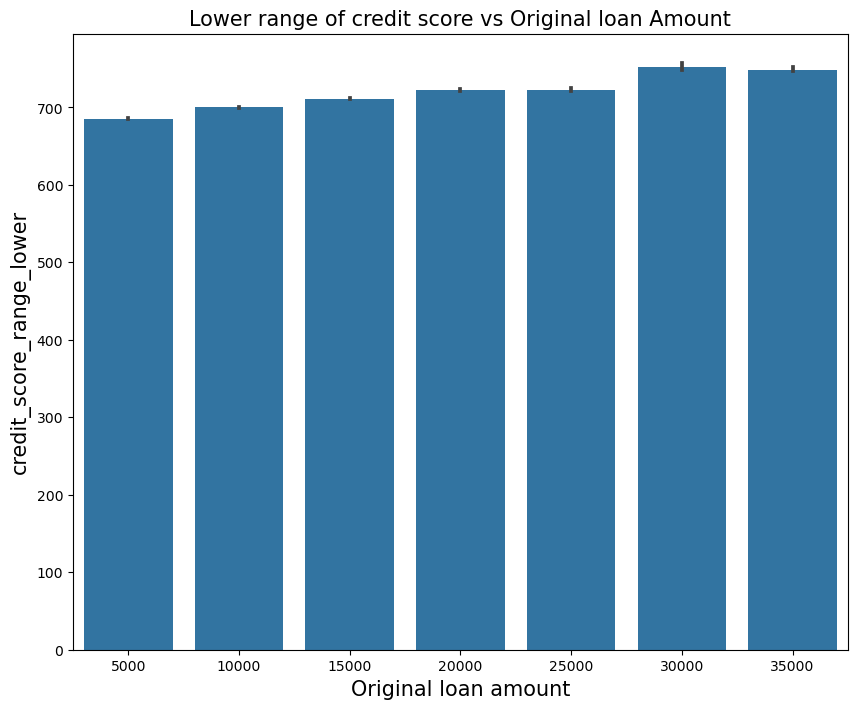

In [54]:
#plotting bar chart to check the relationship between lower credit score range and dloan original amount
plt.figure(figsize = [10, 8])
sb.barplot(data = df_loan_copy_needed, y = 'credit_score_range_lower', x = 'loan_original_amount', color = color)

# Format the plot's visual
plt.ylabel('credit_score_range_lower', size = 15)
plt.xlabel('Original loan amount', size = 15);
plt.title('Lower range of credit score vs Original loan Amount', size = 15);

#### From the above, more people with lower credit score range of greater than 700 took more loan of the range of 30000

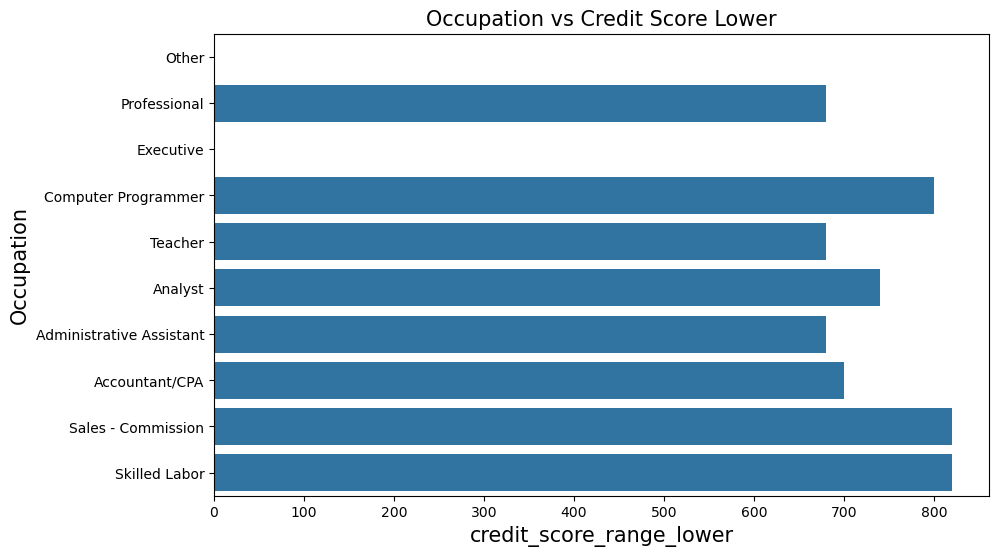

In [55]:
#checking the top 10 occupation against credit score
plt.figure(figsize = [10, 6])
sb.barplot( data = df_loan_copy_needed, x = 'credit_score_range_lower', y = occupation_order, color = color)

# Format the plot's visual
plt.xlabel('credit_score_range_lower', size = 15)
plt.ylabel('Occupation', size = 15);
plt.title('Occupation vs Credit Score Lower', size = 15);

#### Skilled labour and Sales - commission appears to have the highest credit score in the lower range with Executive having no record of lower range credit score

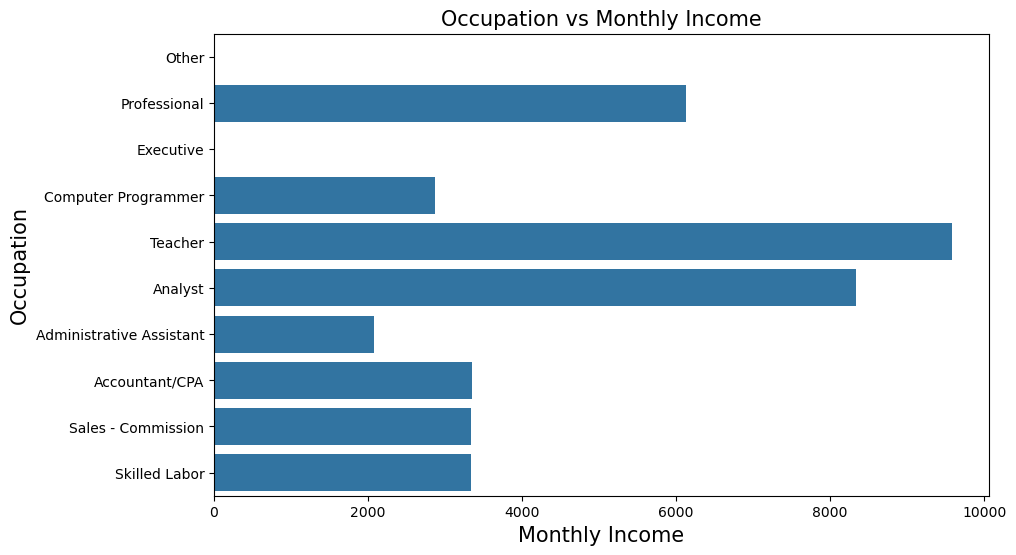

In [56]:
#visualising the monthly income stated by the borrowers againts their profession
plt.figure(figsize = [10, 6])
sb.barplot( data = df_loan_copy_needed, x = 'stated_monthly_income', y = occupation_order, color = color)


# Format the plot's visual
plt.xlabel('Monthly Income', size = 15)
plt.ylabel('Occupation', size = 15);
plt.title('Occupation vs Monthly Income', size = 15);

#### Teachers appears to earn more monthly income than any other profession in the occupation list. The monthly income of Executives and others is not stated hence it is difficult to understand how much they earn that made them eligible for loans or what income category they fall into. Administrative assistant appears to be earning the least amount of monthly income. 

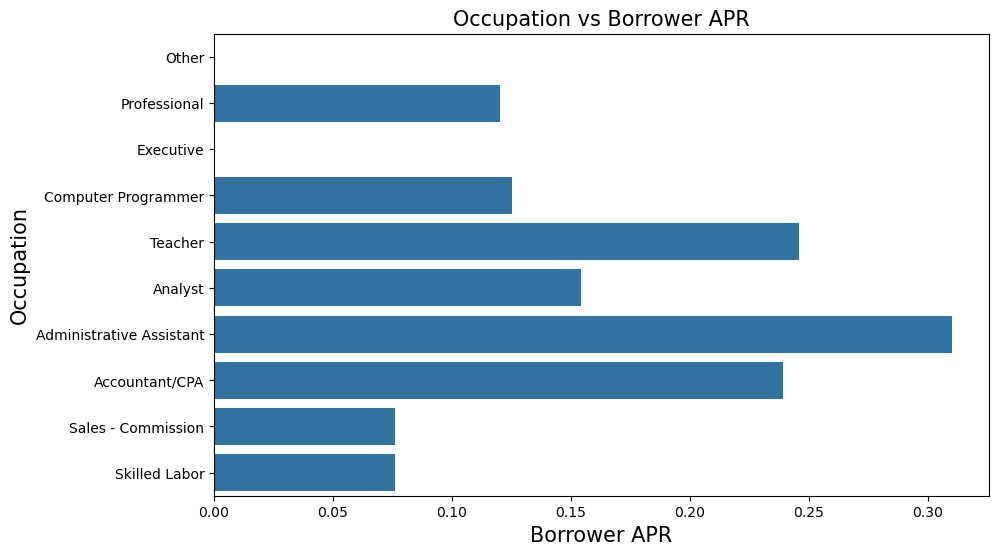

In [57]:
#visualising occupation and Borrower Annual Percentage Rate
plt.figure(figsize = [10, 6])
sb.barplot( data = df_loan_copy_needed, x = 'borrower_apr', y = occupation_order, color = color)


# Format the plot's visual
plt.xlabel('Borrower APR', size = 15)
plt.ylabel('Occupation', size = 15);
plt.title('Occupation vs Borrower APR', size = 15);

#### From the above visualisation, Adminstrative assistant appears to have the highest annual percentage rate while skilled labour and sales-commission have the least

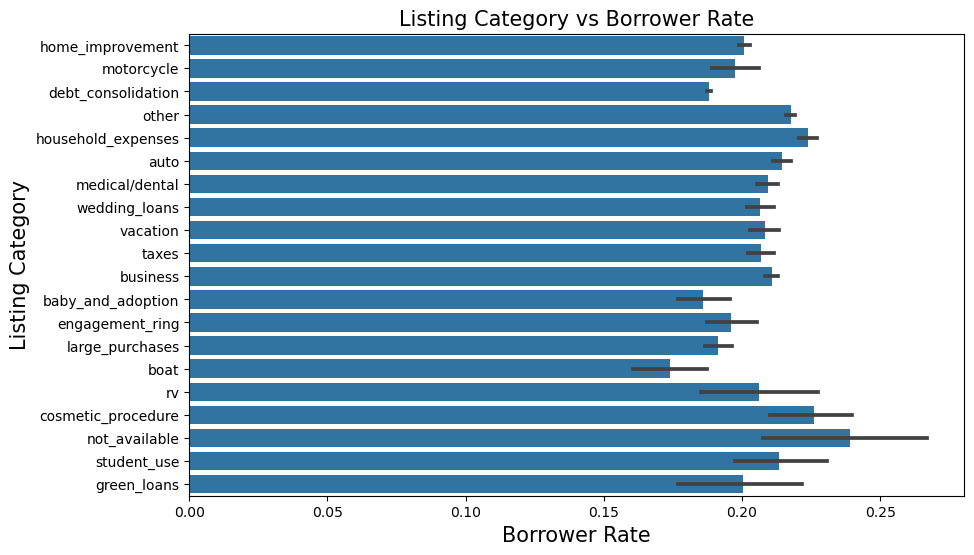

In [58]:
#visualisation of the listing category and borrower rate
plt.figure(figsize = [10, 6])
sb.barplot( data = df_loan_copy_needed, x = 'borrower_rate', y = 'listing_category_(numeric)', color = color)

# Format the plot's visual
plt.xlabel('Borrower Rate', size = 15)
plt.ylabel('Listing Category', size = 15);
plt.title('Listing Category vs Borrower Rate', size = 15);

#### From the above, the highest borrower rate are ones with 'not-available'. This could be due to the suitable category for their loan not being stated in the list. People borrow  for household expenses, cosmetic procedure, engagement ring etc and least borrow for boat

## Multivariate Exploration

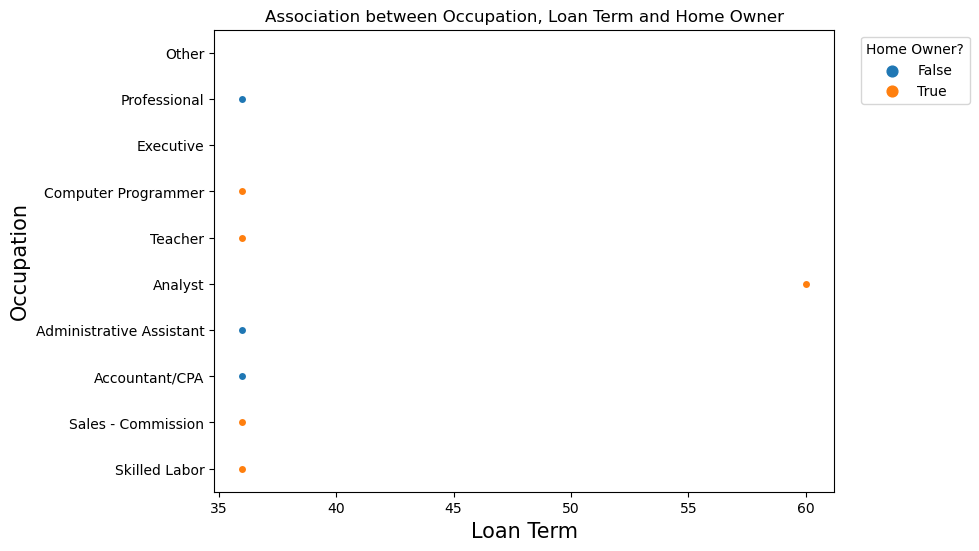

In [59]:
#visualising the relationship between multivariate variables of Occupation, loan term, and home owner
plt.figure(figsize = [8, 6])
sb.swarmplot(data = df_loan_copy_needed, y = occupation_order, x = 'term', hue = 'is_borrower_home_owner')

# Format the plot's visual
plt.xlabel('Loan Term',  size = 15)
plt.ylabel('Occupation', size = 15)
plt.title('Association between Occupation, Loan Term and Home Owner')
plt.legend(title='Home Owner?', bbox_to_anchor=(1.23, 1));

#### Using swarmplot above, most of the long term loan are taken by Analyst who are homeowners. Administrative Assistants take short term loan and are not home owners. Skilled labour, sales-commission, teacher and computer programmers take short term loan eventhough they are homeowners while Professional and Accountat also take short term loan even though they are not home owners 

In [73]:
loan_status_order = df_loan_copy_needed.loan_status.value_counts().index
loan_order = [3, 2, 0,9, 1, 4,8,5,6,7,10]
loan_status_order_2 = [loan_status_order[i] for i in loan_order]

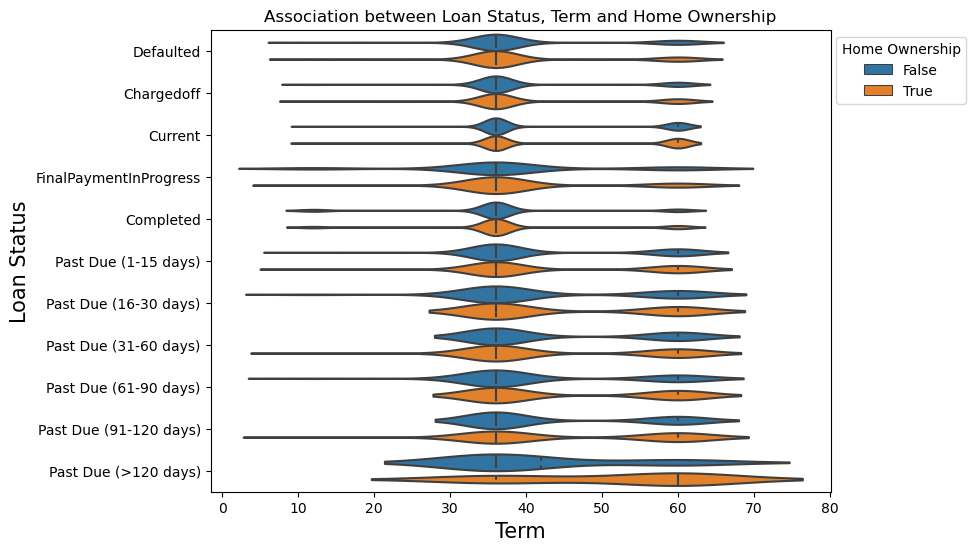

In [79]:
#visualising the association between multivariates Loan status, Term and Home ownership
plt.figure(figsize = [8, 6])
sb.violinplot(data = df_loan_copy_needed, y = 'loan_status', x = 'term', hue = 'is_borrower_home_owner', inner = 'quartile', order = loan_status_order_2 )

# Format the plot's visual
plt.xlabel('Term',  size = 15)
plt.ylabel('Loan Status', size = 15)
plt.title('Association between Loan Status, Term and Home Ownership')
plt.legend(title='Home Ownership', bbox_to_anchor=(1.23, 1));

#### There isn't a distinct characteristics that is unique to ownership of homes checking the loan staus against loan term

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I performed data transformation from int to strings by converting the numbers in the listing categories to their corresponding meaning




### Were there any interesting or surprising interactions between features?

> According to the visualisations, teachers appeared to have more monthly income which was a surprising realisation from the data

## Conclusions
1. It is difficult to estimate and compare the relationship of executives with all of the other variables in the dataset due to lack to availability of data 
2. More options needs to be provided to borrowers who filled 'other' as their profession or should be given a priviledge to write what their profession is as this will enable better understanding of the interactions
3. Majority of the borrowers used it for debt consolidation
4. No loan status past due was more than 120 months
5. Most of the analyst are home owners who take long time loan